In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load data

In [2]:
import sklearn
import sklearn.datasets

def load_data():
    train_X, train_Y = sklearn.datasets.make_moons(n_samples=300, noise=.2)
    test_X, test_Y = sklearn.datasets.make_moons(n_samples=100, noise=.2)
    # Visualize the data
    train_X = train_X.T
    train_Y = train_Y.reshape((1, train_Y.shape[0]))
    test_X = test_X.T
    test_Y = test_Y.reshape((1, test_Y.shape[0]))

    return train_X, train_Y, test_X, test_Y

train_X, train_Y, test_X, test_Y = load_data()

### Fit model

In [3]:
from deepnn.model import DeepNN
from deepnn.utils.layer import Layer
from deepnn.utils import activations

dnn = DeepNN([
    Layer(n=30, activation=activations.ReLU),
    Layer(n=2, activation=activations.ReLU),
    Layer(n=1, activation=activations.sigmoid)
], lr=0.3, num_epochs=1000)

costs = dnn.fit(train_X, train_Y)

### Accuracy

In [4]:
def accuracy(output, Y, threshold=0.5):
    m = Y.shape[1]
    output = np.array(output, copy=True)
    output[output <= threshold] = 0
    output[output > threshold] = 1
    return np.sum((output == Y) / m)

train_output = dnn.predict(train_X)
accuracy(train_output, train_Y)

0.9800000000000001

In [5]:
test_output = dnn.predict(test_X)
accuracy(test_output, test_Y)

0.97

In [6]:
def plot_decision_boundary(model, X, Y):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model(np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=np.squeeze(Y), cmap=plt.cm.Spectral)
    plt.show()

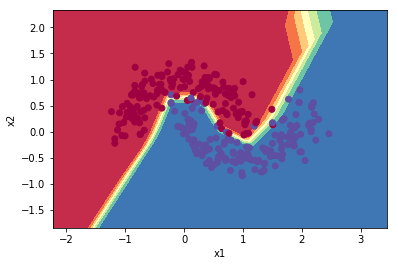

In [7]:
plot_decision_boundary(dnn.predict, train_X, train_Y)

### Cost

In [8]:
def cost_stats(costs):
    return pd.DataFrame([[
        np.max(costs),
        np.argmax(costs),
        np.min(costs),
        np.argmin(costs),
        costs[-1],
        np.mean(costs),
        np.std(costs)
    ]], columns=['max', 'argmax', 'min', 'argmin', 'last', 'mean', 'std'])

cost_stats(costs)

,max,argmax,min,argmin,last,mean,std
0,0.725602,0,0.064145,999,0.064145,0.142289,0.108889


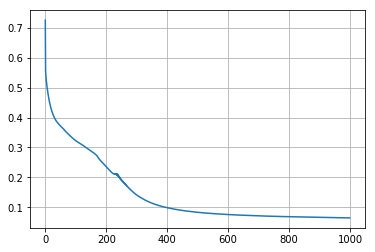

In [9]:
plt.plot(costs)
plt.grid(True)
plt.show()